In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## I. Overview on Training Set

In [95]:
X_train = pd.read_csv('train_values.csv')
X_train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


### - Data types of the columns

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

### - Sum of the NA values in the columns

In [97]:
X_train.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
dtype: int64

In [98]:
cat_cols = ['msa_md', 'state_code', 'county_code', 'lender', 'loan_type', 'loan_purpose', 'preapproval', 'property_type', 'occupancy',
           'applicant_ethnicity', 'applicant_race', 'applicant_sex']

In [99]:
num_cols = ['loan_amount', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income', 
            'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']

## II. Distribution of the numeric columns

### - Summary statstics for the numeric columns

In [100]:
X_train[num_cols].describe().apply(lambda x: np.round(x, 2))

,loan_amount,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units
count,500000.00,460052.00,477535.00,477534.00,477560.00,477486.00,477435.00,477470.00
mean,221.75,102.39,5416.83,31.62,69235.60,91.83,1427.72,1886.15
std,590.64,153.53,2728.14,26.33,14810.06,14.21,737.56,914.12
min,1.00,1.00,14.00,0.53,17858.00,3.98,4.00,1.00
25%,93.00,47.00,3744.00,10.70,59731.00,88.07,944.00,1301.00
50%,162.00,74.00,4975.00,22.90,67526.00,100.00,1327.00,1753.00
75%,266.00,117.00,6467.00,46.02,75351.00,100.00,1780.00,2309.00
max,100878.00,10139.00,37097.00,100.00,125248.00,100.00,8771.00,13623.00


### - Distribution of the numeric columns

D:\Softwares\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Softwares\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


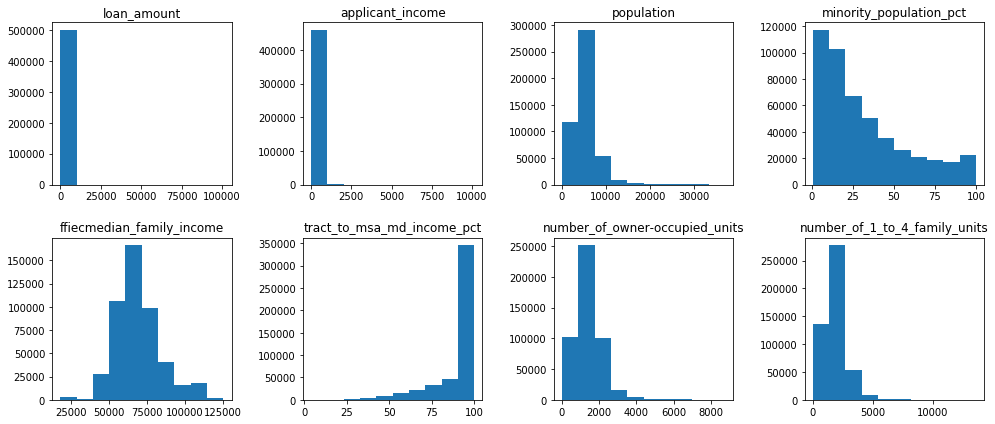

In [101]:
fig = plt.figure(figsize=(14,6))
for i, col in enumerate(num_cols):
    fig = plt.subplot(2,4,i+1)
    plt.hist(X_train[col])
    plt.title(col)
plt.tight_layout(h_pad=2);

## III. Correlation analysis for the numeric columns in the training set
### - Correlation matrix

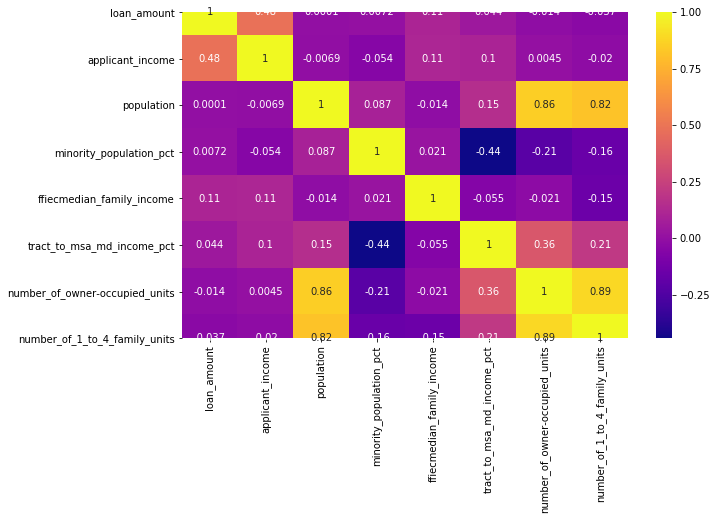

In [102]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(X_train[num_cols].corr(), annot=True, cmap='plasma')

### - Find the highly correlated columns

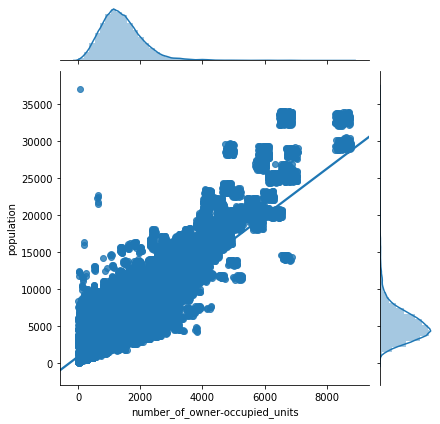

In [103]:
sns.jointplot(y='population', x='number_of_owner-occupied_units', data=X_train, kind='reg', )

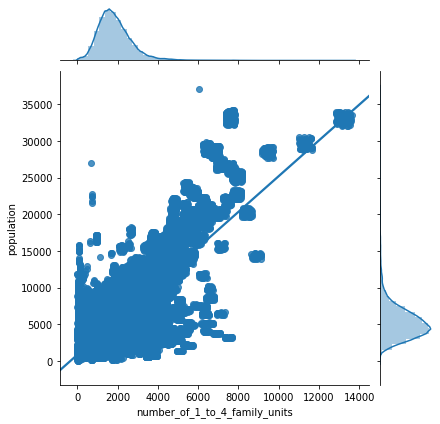

In [104]:
sns.jointplot(y='population', x='number_of_1_to_4_family_units', data=X_train, kind='reg', )

## IV. Distribution of the categorical columns

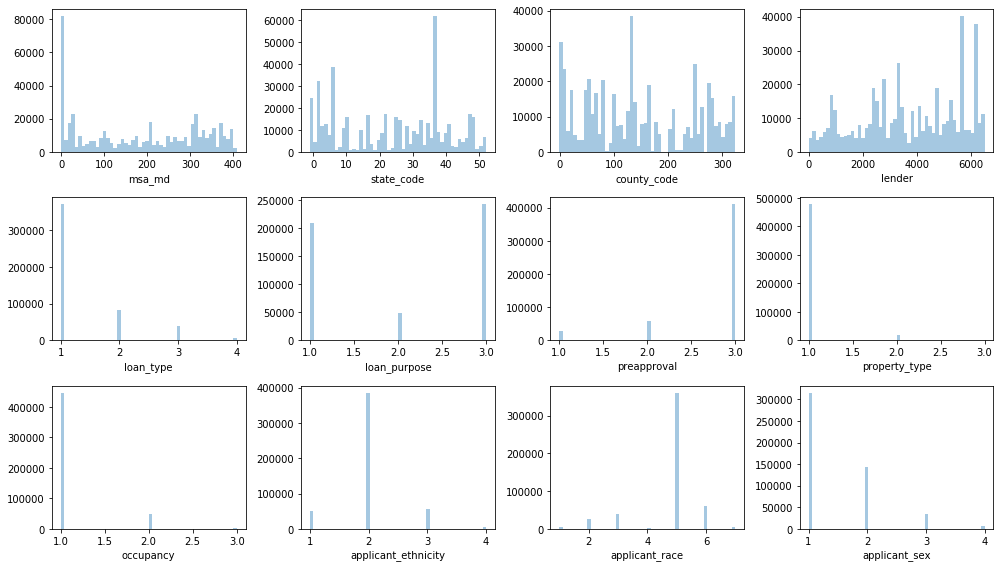

In [105]:
fig = plt.figure(figsize=(14,8))
for i, col in enumerate(cat_cols):
    fig = plt.subplot(3,4,i+1)
    sns.distplot(X_train[col], kde=False)
plt.tight_layout()

## V. Distribution comparison between accepted and not accepted

In [106]:
num_cols.remove('number_of_owner-occupied_units')
num_cols.remove('number_of_1_to_4_family_units')

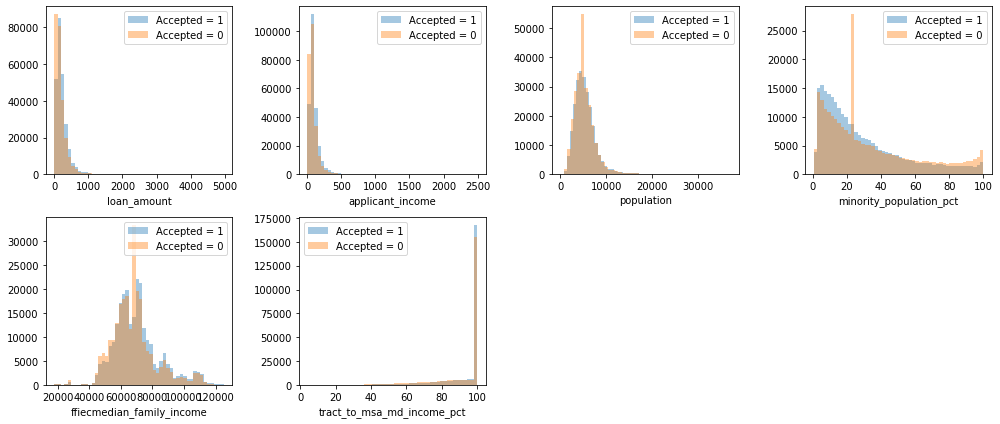

In [107]:
fig = plt.figure(figsize=(14,6))
for i, col in enumerate(num_cols):
    fig = plt.subplot(2,4,i+1)
    sns.distplot(df_merge[col][df_merge['accepted'] == 1], kde=False)
    sns.distplot(df_merge[col][df_merge['accepted'] == 0], kde=False)
    plt.legend(['Accepted = 1', 'Accepted = 0'])
plt.tight_layout()

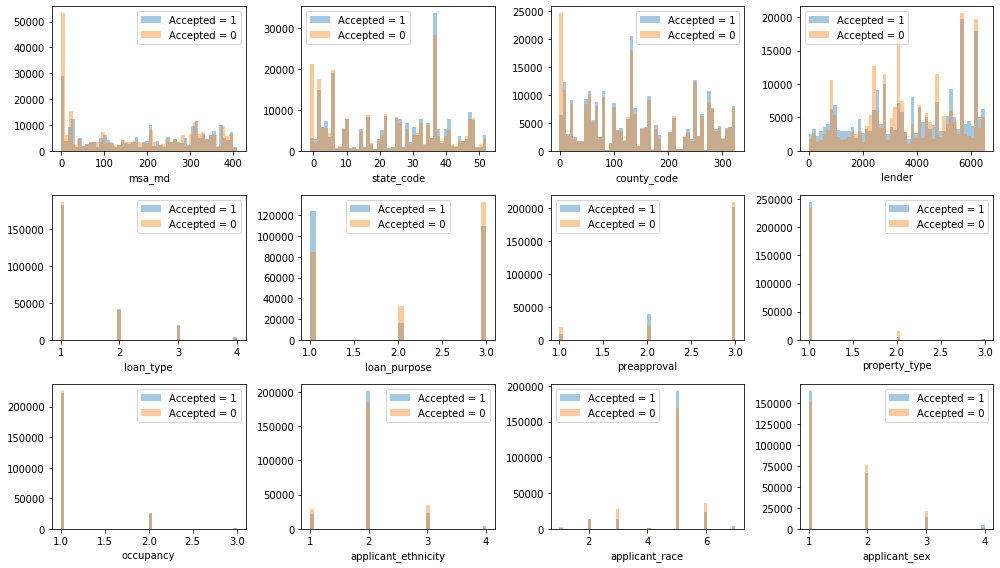

In [108]:
fig = plt.figure(figsize=(14,8))
for i, col in enumerate(cat_cols):
    fig = plt.subplot(3,4,i+1)
    sns.distplot(df_merge[col][df_merge['accepted'] == 1], kde=False)
    sns.distplot(df_merge[col][df_merge['accepted'] == 0], kde=False)
    plt.legend(['Accepted = 1', 'Accepted = 0'])
plt.tight_layout()

## VI. Screen the effects with pivot tables

In [109]:
pd.pivot_table(df_merge, index='loan_type', values='accepted', aggfunc=np.mean, margins=True).apply(lambda x: np.round(x, 2))

,accepted
loan_type,
1,0.50
2,0.51
3,0.52
4,0.56
All,0.50


In [110]:
pd.pivot_table(df_merge, index='loan_purpose', values='accepted', aggfunc=np.mean, margins=True).apply(lambda x: np.round(x, 2))

,accepted
loan_purpose,
1,0.59
2,0.33
3,0.45
All,0.50


In [111]:
pd.pivot_table(df_merge, index='loan_type', columns='loan_purpose', values='accepted', aggfunc=np.mean, margins=True).apply(lambda x: np.round(x, 2))

loan_purpose,1,2,3,All
loan_type,,,,
1,0.60,0.33,0.46,0.50
2,0.60,0.36,0.39,0.51
3,0.58,0.46,0.46,0.52
4,0.57,NaN,0.28,0.56
All,0.59,0.33,0.45,0.50


In [112]:
pd.pivot_table(df_merge, index='preapproval', values='accepted', aggfunc=np.mean, margins=True,).apply(lambda x: np.round(x, 2))

,accepted
preapproval,
1,0.30
2,0.66
3,0.49
All,0.50


In [113]:
pd.pivot_table(df_merge, index='loan_type', columns='preapproval', values='accepted', aggfunc=np.mean, margins=True).apply(lambda x: np.round(x, 2))

preapproval,1,2,3,All
loan_type,,,,
1,0.31,0.67,0.49,0.50
2,0.31,0.62,0.49,0.51
3,0.22,0.67,0.53,0.52
4,0.26,0.60,0.60,0.56
All,0.30,0.66,0.49,0.50


In [114]:
pd.pivot_table(df_merge, index='property_type', values='accepted', aggfunc=np.mean, margins=True,).apply(lambda x: np.round(x, 2))

,accepted
property_type,
1,0.51
2,0.23
3,0.66
All,0.50


In [115]:
pd.pivot_table(df_merge, index='loan_type', columns='property_type', values='accepted', aggfunc=np.mean, margins=True).apply(lambda x: np.round(x, 2))

property_type,1,2,3,All
loan_type,,,,
1,0.51,0.20,0.66,0.50
2,0.51,0.36,0.78,0.51
3,0.52,0.44,NaN,0.52
4,0.56,0.28,NaN,0.56
All,0.51,0.23,0.66,0.50


In [116]:
pd.pivot_table(df_merge, index='occupancy', values='accepted', aggfunc=np.mean, margins=True,).apply(lambda x: np.round(x, 2))

,accepted
occupancy,
1,0.50
2,0.52
3,0.63
All,0.50


In [117]:
pd.pivot_table(df_merge, index='applicant_ethnicity', values='accepted', aggfunc=np.mean, margins=True).apply(lambda x: np.round(x, 2))

,accepted
applicant_ethnicity,
1,0.43
2,0.52
3,0.40
4,0.79
All,0.50


In [118]:
pd.pivot_table(df_merge, index='applicant_race', values='accepted', aggfunc=np.mean, margins=True).apply(lambda x: np.round(x, 2))

,accepted
applicant_race,
1,0.34
2,0.54
3,0.33
4,0.42
5,0.53
6,0.40
7,0.79
All,0.50


In [119]:
pd.pivot_table(df_merge, index='applicant_sex', values='accepted', aggfunc=np.mean, margins=True).apply(lambda x: np.round(x, 2))

,accepted
applicant_sex,
1,0.52
2,0.47
3,0.41
4,0.79
All,0.50


In [120]:
pd.pivot_table(df_merge, index='co_applicant', values='accepted', aggfunc=np.mean, margins=True).apply(lambda x: np.round(x, 2))

,accepted
co_applicant,
False,0.46
True,0.56
All,0.50


## VII. Data cleaning and feature engineering

In [121]:
def data_cleaning(X):
    X= X.fillna(X.median())
    X = X[X['loan_amount'] <= 5000]
    X = X[X['applicant_income'] <= 2500]
    return X

In [122]:
def feature_eng(X):
    X['minority_population'] = X['population'] * X['minority_population_pct']
    X['tract_to_msa_md_income'] = X['ffiecmedian_family_income'] * X['tract_to_msa_md_income_pct']
    X['loan/income'] = X['loan_amount'] / X['applicant_income']
    
    return X

In [123]:
new_cols = ['minority_population', 'tract_to_msa_md_income', 'loan/income']

In [124]:
X_train = data_cleaning(X_train)
X_train = feature_eng(X_train)

In [125]:
y_train = pd.read_csv('train_labels.csv')
y_train = y_train.loc[X_train.index, :]
df_merge = pd.merge(X_train, y_train, on='row_id')
y_train = y_train['accepted']

## VIII. Machine learning - training/validating (Random Forest model in scikit-learn)

In [33]:
X_train = X_train.drop('row_id', axis=1)

In [34]:
bool_cols = ['co_applicant']

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [36]:
features = num_cols + cat_cols + new_cols
for col in ['msa_md', 'state_code', 'county_code']:
    features.remove(col)

In [37]:
rf = RandomForestClassifier(n_estimators=30, max_depth=15, max_features=15, criterion='entropy', random_state=1)
cv = cross_validate(rf, X_train[features], y_train, n_jobs=3, scoring='roc_auc')

D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [38]:
cv['test_score']

array([0.76660869, 0.76829622, 0.76689406])

In [39]:
rf.fit(X_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Text(0.5, 1.0, '\n Varialbe Importance \n')

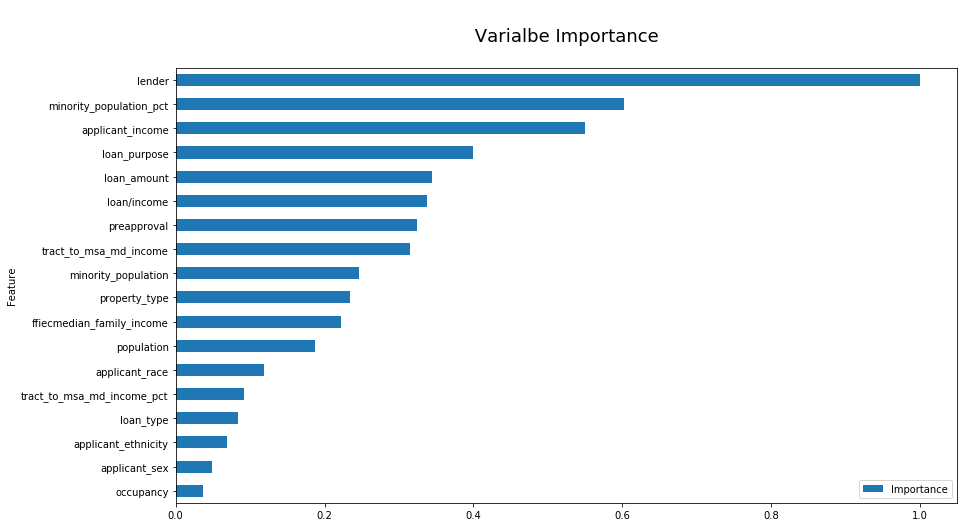

In [40]:
feature_imp = pd.DataFrame(columns=['Feature', 'Importance'])
feature_imp['Feature'] = features
feature_imp['Importance'] = rf.feature_importances_ / np.max(rf.feature_importances_)

feature_imp = feature_imp.sort_values(by='Importance', ascending=True).reindex()
feature_imp.index = feature_imp['Feature']
feature_imp = feature_imp.drop('Feature', axis=1)
feature_imp.plot(kind='barh', figsize=(14,8))
plt.title('\n Varialbe Importance \n', size=18)

## IX. Machine learning - training/validating (AutoML in h2o)

In [41]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 12.0.1+12, mixed mode, sharing)
  Starting server from D:\Softwares\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: D:\Temp\tmpix669_4k
  JVM stdout: D:\Temp\tmpix669_4k\h2o_Chris_Wu_started_from_python.out
  JVM stderr: D:\Temp\tmpix669_4k\h2o_Chris_Wu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,Asia/Taipei
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.2
H2O cluster version age:,2 months and 16 days
H2O cluster name:,H2O_from_python_Chris_Wu_tuycy9
H2O cluster total nodes:,1
H2O cluster free memory:,1.924 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [42]:
df_h2o = h2o.H2OFrame(df_merge)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [43]:
selected_cat_cols = ['loan_purpose', 'preapproval', 'property_type', 'occupancy', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'accepted']
df_h2o[selected_cat_cols] = df_h2o[selected_cat_cols].asfactor()

In [70]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models=20, seed=1, nfolds=3, include_algos=['GBM'])
aml.train(x=features, y='accepted', training_frame=df_h2o)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [74]:
aml.leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20191013_174042,0.791093,0.547064,0.296858,0.430379,0.185226
GBM_grid_1_AutoML_20191013_174042_model_2,0.790254,0.545113,0.298825,0.430226,0.185095
StackedEnsemble_BestOfFamily_AutoML_20191013_174042,0.79025,0.548159,0.303013,0.430822,0.185608
GBM_5_AutoML_20191013_174042,0.786268,0.548041,0.302577,0.431811,0.18646
GBM_5_AutoML_20191013_184413,0.785497,0.54925,0.302788,0.432299,0.186882
GBM_4_AutoML_20191013_184413,0.783768,0.551008,0.304167,0.433111,0.187585
GBM_4_AutoML_20191013_174042,0.783723,0.551455,0.303765,0.433222,0.187681
GBM_3_AutoML_20191013_184413,0.7819,0.553155,0.306258,0.434044,0.188394
GBM_3_AutoML_20191013_174042,0.781617,0.553674,0.304527,0.434244,0.188568
GBM_2_AutoML_20191013_184413,0.780493,0.554898,0.305937,0.434796,0.189047


In [79]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20191013_174042

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.15704620751267992
RMSE: 0.39629055945439823
LogLoss: 0.4808514914626093
Null degrees of freedom: 499461
Residual degrees of freedom: 499457
Null deviance: 692401.3503175952
Residual deviance: 480334.09525779553
AIC: 480344.09525779553
AUC: 0.8552572605554976
pr_auc: 0.8419671067287355
Gini: 0.7105145211109951
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4177157168621845: 


,0,1,Error,Rate
0,157060.0,92649.0,0.371,(92649.0/249709.0)
1,26720.0,223033.0,0.107,(26720.0/249753.0)
Total,183780.0,315682.0,0.239,(119369.0/499462.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4177157,0.7888900,236.0
max f2,0.1977385,0.8752460,328.0
max f0point5,0.6171470,0.7748177,144.0
max accuracy,0.5198099,0.7708434,190.0
max precision,0.9065167,1.0,0.0
max recall,0.0651925,1.0,397.0
max specificity,0.9065167,1.0,0.0
max absolute_mcc,0.4747663,0.5456837,211.0
max min_per_class_accuracy,0.5565582,0.7682703,172.0
max mean_per_class_accuracy,0.5198099,0.7708399,190.0


Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.10 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100008,0.8753516,1.9802059,1.9802059,0.9901902,0.8861380,0.9901902,0.8861380,0.0198036,0.0198036,98.0205935,98.0205935
,2,0.0200015,0.8634310,1.9445734,1.9623897,0.9723724,0.8689974,0.9812813,0.8775677,0.0194472,0.0392508,94.4573438,96.2389686
,3,0.0300003,0.8544022,1.9189339,1.9479063,0.9595515,0.8587858,0.9740390,0.8713079,0.0191870,0.0584377,91.8933875,94.7906349
,4,0.0400010,0.8470039,1.8969300,1.9351616,0.9485485,0.8506012,0.9676660,0.8661310,0.0189707,0.0774085,89.6929987,93.5161621
,5,0.0500018,0.8403827,1.8833176,1.9247924,0.9417417,0.8436723,0.9624810,0.8616391,0.0188346,0.0962431,88.3317573,92.4792396
,6,0.1000016,0.8127650,1.8246100,1.8747022,0.9123854,0.8261136,0.9374337,0.8438767,0.0912301,0.1874732,82.4610014,87.4702208
,7,0.1500014,0.7874698,1.7337199,1.8277087,0.8669363,0.8000642,0.9139349,0.8292727,0.0866856,0.2741589,73.3719851,82.7708716
,8,0.2000012,0.7618788,1.6694161,1.7881359,0.8347816,0.7747473,0.8941467,0.8156415,0.0834705,0.3576293,66.9416061,78.8135949
,9,0.3000008,0.7045807,1.5518594,1.7093776,0.7759981,0.7339010,0.8547641,0.7883948,0.1551853,0.5128147,55.1859445,70.9377640
,10,0.4000004,0.6365927,1.3740030,1.6255344,0.6870620,0.6715850,0.8128388,0.7591925,0.1373998,0.6502144,37.4003011,62.5534402




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18522623135541405
RMSE: 0.4303791716096564
LogLoss: 0.5470635667989722
Null degrees of freedom: 499461
Residual degrees of freedom: 499457
Null deviance: 692405.5761637995
Residual deviance: 546474.9264010965
AIC: 546484.9264010965
AUC: 0.7910925648978956
pr_auc: 0.7639393362915045
Gini: 0.5821851297957912
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3442042249492047: 


,0,1,Error,Rate
0,127984.0,121725.0,0.4875,(121725.0/249709.0)
1,26536.0,223217.0,0.1062,(26536.0/249753.0)
Total,154520.0,344942.0,0.2968,(148261.0/499462.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3442042,0.7506941,271.0
max f2,0.1594933,0.8601723,349.0
max f0point5,0.5675000,0.7131391,171.0
max accuracy,0.5014266,0.7164990,203.0
max precision,0.8989645,0.9636364,2.0
max recall,0.0644901,1.0,398.0
max specificity,0.9070075,0.9999760,0.0
max absolute_mcc,0.3978339,0.4417713,248.0
max min_per_class_accuracy,0.5554686,0.7112307,177.0
max mean_per_class_accuracy,0.5014266,0.7164939,203.0


Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100008,0.8732495,1.8624986,1.8624986,0.9313313,0.8842967,0.9313313,0.8842967,0.0186264,0.0186264,86.2498586,86.2498586
,2,0.0200015,0.8607060,1.7972391,1.8298688,0.8986987,0.8665760,0.9150150,0.8754364,0.0179738,0.0366002,79.7239070,82.9868828
,3,0.0300003,0.8513868,1.7327268,1.7974925,0.8664397,0.8558256,0.8988254,0.8689003,0.0173251,0.0539253,73.2726811,79.7492478
,4,0.0400010,0.8436547,1.7311788,1.7809132,0.8656657,0.8474730,0.8905351,0.8635432,0.0173131,0.0712384,73.1178823,78.0913234
,5,0.0500018,0.8368223,1.7119613,1.7671223,0.8560561,0.8402000,0.8836390,0.8588744,0.0171209,0.0883593,71.1961297,76.7122295
,6,0.1000016,0.8086447,1.6499568,1.7085407,0.8250511,0.8223375,0.8543456,0.8406063,0.0824975,0.1708568,64.9956758,70.8540699
,7,0.1500014,0.7830667,1.5654729,1.6608521,0.7828054,0.7957928,0.8304992,0.8256687,0.0782733,0.2491301,56.5472950,66.0852086
,8,0.2000012,0.7567605,1.5069349,1.6223732,0.7535338,0.7699853,0.8112580,0.8117480,0.0753464,0.3244766,50.6934880,62.2373170
,9,0.3000008,0.6990824,1.4177264,1.5541580,0.7089256,0.7286016,0.7771475,0.7840327,0.1417721,0.4662487,41.7726385,55.4158030
,10,0.4000004,0.6317410,1.2930027,1.4888695,0.6465583,0.6661822,0.7445003,0.7545702,0.1292997,0.5955484,29.3002659,48.8869514


## X. Generate predictions on test dataset with the best ML model

In [84]:
X_test = pd.read_csv('test_values.csv')
X_test = X_test.fillna(X_test.median())
X_test = feature_eng(X_test)
X_test = X_test.drop('row_id', axis=1)

X_test.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,minority_population,tract_to_msa_md_income,loan/income
0,2,1,3,1,115.0,3,101,16,276,2,...,59.536,69889.0,85.78,1874.0,2410.0,3791,True,376803.344,5995078.42,1.554054
1,1,1,1,1,252.0,2,87,20,68,2,...,8.050,65313.0,100.00,947.0,1214.0,2839,True,19907.650,6531300.00,2.355140
2,1,1,1,1,270.0,1,-1,-1,-1,2,...,22.955,67514.0,100.00,1326.0,1753.0,4701,False,114201.125,6751400.00,2.268908
3,2,1,1,1,179.0,2,376,20,11,2,...,29.676,57766.0,100.00,1426.0,1765.0,2153,True,142296.420,5776600.00,4.068182
4,2,1,1,1,36.0,2,254,48,156,3,...,5.110,63332.0,100.00,1452.0,2092.0,5710,False,26807.060,6333200.00,1.125000


In [85]:
X_test = h2o.H2OFrame(X_test)
y_predict = aml.leader.predict(X_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [90]:
y_predict = y_predict.as_data_frame()
y_predict

,predict,p0,p1
0,1,0.196275,0.803725
1,1,0.203826,0.796174
2,0,0.920800,0.079200
3,1,0.222352,0.777648
4,0,0.678128,0.321872
...,...,...,...
499995,0,0.872596,0.127404
499996,1,0.241132,0.758868
499997,1,0.641042,0.358958
499998,1,0.559490,0.440510


In [91]:
df_predict = pd.DataFrame(np.arange(len(y_predict)), columns=['row_id'])
df_predict['accepted'] = y_predict['predict']

In [92]:
df_predict

,row_id,accepted
0,0,1
1,1,1
2,2,0
3,3,1
4,4,0
...,...,...
499995,499995,0
499996,499996,1
499997,499997,1
499998,499998,1


In [93]:
df_predict.to_csv('prediction.csv', index=False)